In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV



In [2]:
from datetime import datetime

def log(msg):
    f = open("log.txt", "a")
    f.write("\n")
    f.write("==============================================")
    f.write("\n")
    for line in msg:
        f.write(line)
        f.write("\n")
    f.close()
    
log_data= [datetime.now().strftime("%d/%m/%Y, %H:%M:%S")]
log_data.append("SVR")
log_data.append("PCA")


In [3]:
df = pd.read_csv('processed_data.csv')
print(df.head(10))

   P conc. (mg/kg)  K conc. (mg/kg)  Chlorophyll-a       4       5       6  \
0           3620.0          58360.0           44.0  0.9707  0.9546  0.9384   
1           3506.0          51290.0           42.1  1.3097  1.2930  1.2722   
2           3036.0          51420.0           39.4  1.9541  1.9210  1.8844   
3           4576.0          43325.0           47.9  1.4033  1.3937  1.3833   
4           4012.0          40245.0           48.6  0.7786  0.7727  0.7686   
5           4619.0          40521.0           45.1  2.0162  1.9847  1.9507   
6           4514.0          45712.0           41.6  1.3164  1.2872  1.2557   
7           5455.0          41235.0           45.6  1.0908  1.0700  1.0465   
8           4304.0          44213.0           42.6  1.2809  1.2643  1.2464   
9           4919.0          35530.0           39.9  1.9447  1.9289  1.9158   

        7       8       9      10  ...    2144     2145     2146     2147  \
0  0.9260  0.9167  0.9099  0.9091  ...  8.8199   9.4612   9.9928

In [4]:
scaler = StandardScaler()

X = df.iloc[: , 3:]

print(X)

Y = df['Chlorophyll-a']
Y1 = df['P conc. (mg/kg)']
Y2 = df['K conc. (mg/kg)']


          4       5       6       7       8       9      10      11      12  \
0    0.9707  0.9546  0.9384  0.9260  0.9167  0.9099  0.9091  0.9135  0.9226   
1    1.3097  1.2930  1.2722  1.2524  1.2341  1.2178  1.2069  1.2011  1.2002   
2    1.9541  1.9210  1.8844  1.8523  1.8266  1.8103  1.7965  1.7856  1.7809   
3    1.4033  1.3937  1.3833  1.3735  1.3650  1.3584  1.3551  1.3545  1.3548   
4    0.7786  0.7727  0.7686  0.7614  0.7543  0.7506  0.7459  0.7412  0.7405   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
163  2.8373  2.8121  2.7745  2.7324  2.6934  2.6653  2.6464  2.6346  2.6231   
164  3.3757  3.3207  3.2677  3.2207  3.1806  3.1482  3.1351  3.1338  3.1205   
165  1.1296  1.0905  1.0720  1.0474  1.0316  1.0402  1.0498  1.0567  1.0534   
166  2.6838  2.6354  2.5857  2.5579  2.5366  2.5048  2.5052  2.5289  2.5429   
167  2.5029  2.4714  2.4522  2.4273  2.4044  2.3904  2.3790  2.3722  2.3832   

         13  ...     2144     2145     2146     214

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.4, random_state=42)

X_train, X_test, y1_train, y1_test = train_test_split(
    X, Y1, test_size=0.4, random_state=42)

X_train, X_test, y2_train, y2_test = train_test_split(
    X, Y2, test_size=0.4, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# print(y1_train.isnull().values.any())

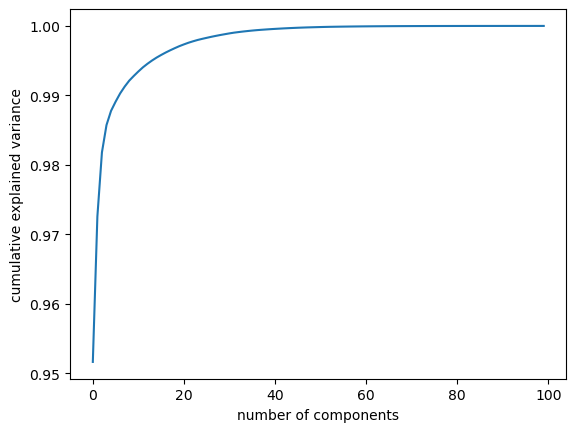

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(X_train_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

num_components = 20
pca = PCA(n_components=num_components)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [7]:
random_grid = {'C': [1,10,100],
               'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
               'epsilon': [0.01, 0.5]}
grid_svr_performance = GridSearchCV(SVR(), param_grid = random_grid, scoring = 'r2', cv=5)
grid_svr_performance.fit(X_train_pca, y2_train)
grid_svr_performance.best_params_

{'C': 1, 'epsilon': 0.5, 'kernel': 'linear'}

In [8]:
random_grid = {'C': [1,10,100],
               'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
               'epsilon': [0.01, 0.5]}
grid_svr_performance = GridSearchCV(SVR(), param_grid = random_grid, scoring = 'r2', cv=5)
grid_svr_performance.fit(X_train_pca, y1_train)
grid_svr_performance.best_params_

{'C': 1, 'epsilon': 0.01, 'kernel': 'linear'}

In [9]:
random_grid = {'C': [1,10,100],
               'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
               'epsilon': [0.01, 0.5]}
grid_svr_performance = GridSearchCV(SVR(), param_grid = random_grid, scoring = 'r2', cv=5)
grid_svr_performance.fit(X_train_pca, y_train)
grid_svr_performance.best_params_

{'C': 1, 'epsilon': 0.01, 'kernel': 'sigmoid'}

In [10]:
model = SVR(C= 10, gamma= 0.2, kernel= 'rbf')
model.fit(X_train_pca,y_train)

SVR(C=10, gamma=0.2)

In [11]:
model2 = SVR(C= 10, gamma= 0.1, kernel= 'linear')
model2.fit(X_train_pca,y1_train)

SVR(C=10, gamma=0.1, kernel='linear')

In [12]:
model3 = SVR(C= 1, gamma= 0.1, kernel= 'linear')
model3.fit(X_train_pca,y2_train)

SVR(C=1, gamma=0.1, kernel='linear')

In [13]:
predictions = model.predict(X_test_pca)
predictions1 = model2.predict(X_test_pca)
predictions2 = model3.predict(X_test_pca)

In [14]:
chlo_score = r2_score(y_test, predictions)
chlor_mean_err = mean_squared_error(y_test, predictions)

p_score = r2_score(y1_test, predictions1)
p_mean_err = mean_squared_error(y1_test, predictions1)

k_score = r2_score(y2_test, predictions2)
k_mean_err = mean_squared_error(y2_test, predictions2)

log_data.append("R square of Chlorophyll-a: " +str(chlo_score))
log_data.append("R square of P: " + str(p_score))
log_data.append("R square of K: " + str(k_score))
log_data.append("Mean squared error of Chlorophyll-a: " +str(chlor_mean_err))
log_data.append("Mean squared error of P: " +str(p_mean_err))
log_data.append("Mean squared error of K: " +str(k_mean_err))

print('R square of Chlorophyll-a: ', chlo_score,)
print('R square of P: ', p_score,)
print('R square of K: ', k_score,)
print('Mean squared error of Chlorophyll-a: ', chlor_mean_err,)
print('Mean squared error of P: ', p_mean_err,)
print('Mean squared error of K: ', k_mean_err,)



R square of Chlorophyll-a:  -0.0795036306278718
R square of P:  -0.012110123436639864
R square of K:  -0.10650076176877632
Mean squared error of Chlorophyll-a:  9.239589236704388
Mean squared error of P:  692589.3274054085
Mean squared error of K:  117315720.00865781


In [15]:
def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

In [16]:
chlo_mean_abs_err = mape(y_test, predictions)
p_mean_abs_err = mape(y1_test, predictions1)
k_mean_abs_err = mape(y2_test, predictions2)
log_data.append("Mean absolute percentage error of Chlorophyll-a: " +str(chlo_mean_abs_err))
log_data.append("Mean absolute percentage error of P: " +str(p_mean_abs_err))
log_data.append("Mean absolute percentage error of K: " +str(k_mean_abs_err))


print('Mean absolute percentage error of Chlorophyll-a: ', chlo_mean_abs_err)
print('Mean absolute percentage error of P: ', p_mean_abs_err)
print('Mean absolute percentage error of K: ', k_mean_abs_err)

Mean absolute percentage error of Chlorophyll-a:  0.05713383288873421
Mean absolute percentage error of P:  0.1976211516133974
Mean absolute percentage error of K:  0.3200527383512043


In [17]:
from csv import writer

csv_data = log_data[:3]

for i in log_data[3:]:
    i = i.split(": ")[1]
    csv_data.append(i)
    
with open('result.csv', 'a') as file:
    csvWriter = writer(file ,delimiter=',')
    csvWriter.writerow(csv_data)
    file.close()

log(log_data)

In [ ]:
from csv import writer

csv_data = log_data[:3]

for i in log_data[3:]:
    i = i.split(": ")[1]
    csv_data.append(i)
    
with open('result.csv', 'a') as file:
    csvWriter = writer(file ,delimiter=',')
    csvWriter.writerow(csv_data)
    file.close()

log(log_data)